# Рубежный контроль №2

# Никулин Данила ИУ5-61Б Вариант 10

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Методы для группы ИУ5-61Б:
1. Линейная/логистическая регрессия
2. Случайный лес

Набор данных:

https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent (файл houses_to_rent_v2.csv)

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [308]:
data=pd.read_csv('data/houses_to_rent_v2.csv',sep=",")

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [310]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [311]:
numeric_elements = data['floor'].replace('-', np.nan).apply(pd.to_numeric, errors='coerce')
mean_value = int(numeric_elements.mean(skipna=True))
data['floor'] = data['floor'].replace('-', str(mean_value)).astype(int)

data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

Кодирование и преобразоване категориальных данных

In [312]:
data['animal'] = LabelEncoder().fit_transform(data['animal'])
data['furniture'] = LabelEncoder().fit_transform(data['furniture'])

ohe = OneHotEncoder()
city_encoded = ohe.fit_transform(data[['city']]).toarray()
data = pd.concat([data, pd.DataFrame(city_encoded, columns=ohe.get_feature_names_out())], axis=1)
data.drop('city', axis=1, inplace=True)

In [313]:
data.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,70,2,1,1,7,0,0,2065,3300,211,42,5618,0.0,0.0,0.0,0.0,1.0
1,320,4,4,0,20,0,1,1200,4960,1750,63,7973,0.0,0.0,0.0,0.0,1.0
2,80,1,1,1,6,0,1,1000,2800,0,41,3841,0.0,0.0,1.0,0.0,0.0
3,51,2,1,0,2,0,1,270,1112,22,17,1421,0.0,0.0,1.0,0.0,0.0
4,25,1,1,0,1,1,1,0,800,25,11,836,0.0,0.0,0.0,0.0,1.0


In [314]:
data.dtypes

area                     int64
rooms                    int64
bathroom                 int64
parking spaces           int64
floor                    int64
animal                   int64
furniture                int64
hoa (R$)                 int64
rent amount (R$)         int64
property tax (R$)        int64
fire insurance (R$)      int64
total (R$)               int64
city_Belo Horizonte    float64
city_Campinas          float64
city_Porto Alegre      float64
city_Rio de Janeiro    float64
city_São Paulo         float64
dtype: object

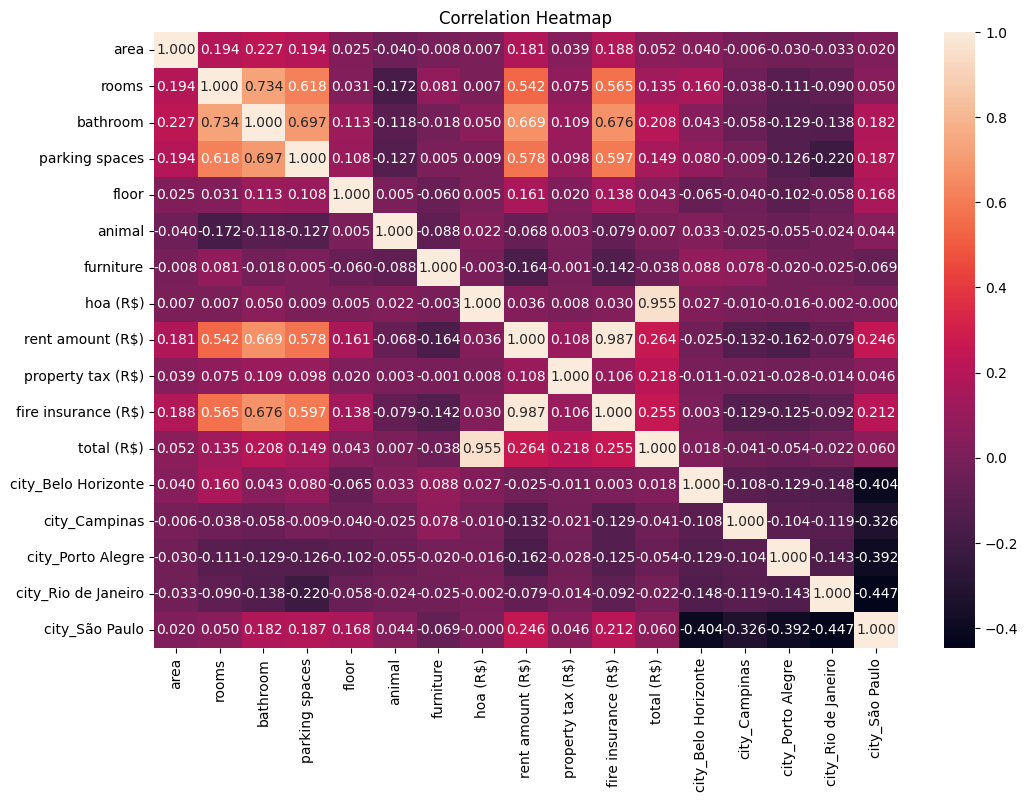

In [315]:
# Масштабирование данных
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Построение тепловой карты корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()

Разделяем данные на обучающую и тестовую выборки

In [316]:
X = data.drop(columns=['rent amount (R$)'])
y = data['rent amount (R$)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Обучение моделей**




1. Линейная регресия

In [319]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

# Оценка модели линейной регрессии
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Модель линейной регрессии:")
print(f"Среднеквадратичная ошибка (MSE) = {mse_lr}")
print(f"Средняя абсолютная ошибка (MAE) = {mae_lr}")
print(f"Коэффициент детерминации (R²) = {r2_lr}")

Модель линейной регрессии:
Среднеквадратичная ошибка (MSE) = 9.641379452147344e-08
Средняя абсолютная ошибка (MAE) = 0.00015485319269155533
Коэффициент детерминации (R²) = 0.9999998986066924


2. Случайный лес

In [320]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Оценка модели случайного леса
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Модель случайного леса:")
print(f"Среднеквадратичная ошибка (MSE) = {mse_rf}")
print(f"Средняя абсолютная ошибка (MAE) = {mae_rf}")
print(f"Коэффициент детерминации (R²) = {r2_rf}")

Модель случайного леса:
Среднеквадратичная ошибка (MSE) = 0.004101190839377893
Средняя абсолютная ошибка (MAE) = 0.016902734972421122
Коэффициент детерминации (R²) = 0.9956869936879017


Вывод

Сравнивая метрики качества, можно сделать вывод, что обе модели показали себя хорошо, мы получили практически идентичные результаты, модель случайного леса совсем на немного лучше модели линейной регрессии, наибольшее различие сдесь в метрике MSE. Линейная регрессия предполагает, что независимые переменные не коррелируют между собой. Если это предположение нарушается, то линейная регрессия может давать неточные результаты. Случайный лес может обрабатывать взаимосвязанные переменные, поэтому он может быть более точным, чем линейная регрессия, в случаях, когда независимые переменные коррелируют между собой.
